In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [6]:
# Read the file provided
df = pd.read_csv('german_credit.csv')
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [10]:
# Dimension of dataframe
print("Dimension of dataframe:", df.ndim)

# Dimension of data
print("Dimension of data:", df.shape)

Dimension of dataframe: 2
Dimension of data: (1000, 21)


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [11]:
from sklearn.model_selection import train_test_split
df_h1, df_h2 = train_test_split(df, test_size=0.5, random_state = 5)
df_h1.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
34,0,>= 200 DM / salary assignments for at least 1 ...,12,existing credits paid back duly till now,radio/television,1474,... < 100 DM,... < 1 year,4,female : divorced/separated/married,...,1,if not A121 : building society savings agreeme...,33,bank,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
552,1,< 0 DM,48,existing credits paid back duly till now,domestic appliances,6999,... < 100 DM,4 <= ... < 7 years,1,male : married/widowed,...,1,real estate,34,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
170,1,< 0 DM,15,no credits taken/ all credits paid back duly,car (new),950,... < 100 DM,.. >= 7 years,4,male : single,...,3,"if not A121/A122 : car or other, not in attrib...",33,none,rent,2,skilled employee / official,2,none,yes
466,1,< 0 DM,24,delay in paying off in the past,domestic appliances,1659,... < 100 DM,... < 1 year,4,female : divorced/separated/married,...,2,"if not A121/A122 : car or other, not in attrib...",29,none,rent,1,unskilled - resident,1,"yes, registered under the customers name",yes
713,0,< 0 DM,9,critical account/ other credits existing (not ...,domestic appliances,1138,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,real estate,25,none,own,2,unskilled - resident,1,none,yes


In [12]:
df_h1.shape

(500, 21)

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [13]:
object_list = list(df_h1.select_dtypes(include ='object').columns)
df_h1 = pd.get_dummies(df_h1, columns=object_list)

In [14]:
# Print Shape of model data
df_h1.shape

(500, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [15]:
# Getting the correlation
df_h1.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.232277,0.213898,0.072558,0.024307,0.014624,-0.017988,0.002662,0.139863,0.273193,...,-0.187481,0.106795,0.124313,-0.097461,0.002118,0.004079,0.018460,-0.018460,-0.076642,0.076642
duration_in_month,0.232277,1.000000,0.654040,0.027427,0.031647,-0.028739,-0.012318,-0.088616,0.119097,-0.029266,...,-0.084126,-0.080277,0.175638,0.015190,-0.078192,-0.153405,-0.150134,0.150134,-0.166076,0.166076
credit_amount,0.213898,0.654040,1.000000,-0.252611,0.047423,0.072994,0.054255,-0.047328,0.150565,-0.066205,...,-0.163430,-0.028719,0.380871,-0.140484,-0.051385,-0.160887,-0.268796,0.268796,-0.089325,0.089325
installment_as_income_perc,0.072558,0.027427,-0.252611,1.000000,0.048169,0.043957,-0.045177,-0.088518,-0.045938,0.045556,...,0.069805,-0.093490,0.050609,0.012890,-0.018606,-0.055904,-0.033286,0.033286,-0.096767,0.096767
present_res_since,0.024307,0.031647,0.047423,0.048169,1.000000,0.268706,0.114518,0.048558,-0.058353,0.120912,...,-0.304161,0.172441,-0.024081,0.018829,-0.033399,0.010363,-0.101722,0.101722,-0.060475,0.060475
age,0.014624,-0.028739,0.072994,0.043957,0.268706,1.000000,0.141117,0.105151,-0.086802,0.022848,...,-0.024398,-0.169303,0.086560,-0.135093,0.049706,0.068617,-0.147134,0.147134,-0.017185,0.017185
credits_this_bank,-0.017988,-0.012318,0.054255,-0.045177,0.114518,0.141117,1.000000,0.109156,-0.072384,-0.034471,...,0.026888,-0.054571,-0.012096,0.015328,0.083657,-0.035721,-0.065252,0.065252,-0.039526,0.039526
people_under_maintenance,0.002662,-0.088616,-0.047328,-0.088518,0.048558,0.105151,0.109156,1.000000,-0.051329,0.010843,...,-0.023277,-0.037070,-0.043847,-0.138984,0.026481,0.200835,0.076440,-0.076440,0.141002,-0.141002
account_check_status_0 <= ... < 200 DM,0.139863,0.119097,0.150565,-0.045938,-0.058353,-0.086802,-0.072384,-0.051329,1.000000,-0.385042,...,-0.013532,0.002459,0.053099,-0.044877,0.016722,0.000384,-0.026229,0.026229,-0.081100,0.081100
account_check_status_< 0 DM,0.273193,-0.029266,-0.066205,0.045556,0.120912,0.022848,-0.034471,0.010843,-0.385042,1.000000,...,-0.123139,0.110966,-0.020718,-0.035620,0.050299,0.045541,0.073330,-0.073330,0.032805,-0.032805


In [16]:
object_list

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

### Drop the original variables which are converted to dummy

In [17]:
df_h1.columns
# Original columns are already deleted from the list while converting them in dummy.

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [18]:
# Splitting the dataframe into training and test set in the ratio of 70:30 
Y = df_h1['default']
X = df_h1.drop(['default'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
model = RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score, classification_report
print('Accuracy Score is: ', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix is: ', confusion_matrix(Y_test, Y_pred))

Accuracy Score is:  0.7466666666666667
Confusion Matrix is:  [[90  9]
 [29 22]]


### Q6 Show the list of the features importance( 1 Marks)

In [21]:
print(model.feature_importances_)

[0.07961613 0.10355026 0.03667411 0.03297564 0.0729069  0.02027067
 0.01179173 0.01510909 0.03137252 0.00716564 0.04719836 0.00824302
 0.02273412 0.01058256 0.01458129 0.00743642 0.01092851 0.01073919
 0.01372721 0.00996437 0.01300125 0.00694941 0.00199811 0.01423089
 0.00105073 0.00072373 0.00643512 0.01842474 0.00875547 0.00816531
 0.01406096 0.0113531  0.01620905 0.01423445 0.01277176 0.00770032
 0.01305163 0.00962406 0.00782077 0.01555724 0.00423828 0.00461766
 0.00676587 0.01305097 0.01486065 0.01824311 0.0132823  0.01326555
 0.01531491 0.00701088 0.00994416 0.02040454 0.01248068 0.01428983
 0.01591563 0.00188694 0.01044174 0.01540701 0.01522039 0.00203063
 0.00164246]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,  cross_val_predict

In [23]:
# Use below values
num_folds = 10
seed = 77

In [27]:
#Validate the Random Forest model build above using k fold

models = []
models.append(('RF', RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 8888)))


# evaluate  model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[0.74 0.84 0.86 0.72 0.76 0.66 0.76 0.68 0.76 0.78]
RF: 0.756000 (0.059195)


In [28]:
#Calculate Mean score
np.mean(results)

0.756

In [29]:
# Calculate score standard deviation using std()
# Calculate score standard deviation using std()
np.std(results)

0.05919459434779495

# Q8 Print the confusion matrix( 1 Marks)

In [35]:
y_predict = cross_val_predict(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 8888), X, Y, cv=10)
print(confusion_matrix(Y, y_predict))

[[307  30]
 [ 96  67]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [36]:
print(accuracy_score(Y, y_predict))
print(precision_score(Y, y_predict))
print(classification_report(Y, y_predict)) 

0.748
0.6907216494845361
             precision    recall  f1-score   support

          0       0.76      0.91      0.83       337
          1       0.69      0.41      0.52       163

avg / total       0.74      0.75      0.73       500



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [37]:
fpr, tpr, thresholds = roc_curve(Y, y_predict)
print(fpr, tpr, thresholds)

[0.         0.08902077 1.        ] [0.         0.41104294 1.        ] [2 1 0]


No handles with labels found to put in legend.


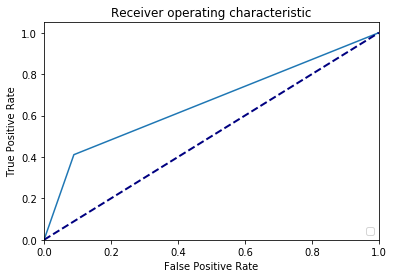

In [38]:
lw =2
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
